#### Here I will be implementing KNN regressor from scratch using inbuilt dataset from sklearn

In [1]:
# imports
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import time

In [3]:
df=fetch_california_housing()
X=df.data
y=df.target

In [4]:
# I am splitting data for testing later on
train_test_split_percent=0.75

In [5]:
# creating train and test sets
n=X.shape[0]
X_train=X[:int(train_test_split_percent*n),:]
X_test=X[int(train_test_split_percent*n):,:]
y_train=y[:int(train_test_split_percent*n)]
y_test=y[int(train_test_split_percent*n):]

In [6]:
#looking at the training set
X_train

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   3.1793    ,   15.        ,    5.88767396, ...,    3.9194831 ,
          33.16      , -117.18      ],
       [   3.5839    ,    5.        ,    5.24861878, ...,    3.0121547 ,
          33.16      , -117.15      ],
       [   5.6874    ,   16.        ,    7.75700935, ...,    3.42523364,
          33.16      , -117.14      ]])

In [7]:
# I can see that the features are not scaled as KNN is highly prone to these so I am scaling them.
# To build a robust model, I need to standardise the dataset. (i.e make the mean = 0 and variance = 1)

In [8]:
# Standardizing the train and test sets
import numpy as np
mean_x=np.mean(X_train,0)
std_dev_x=np.std(X_train,0)
X_train=(X_train-mean_x)/std_dev_x
X_test=(X_test-mean_x)/std_dev_x
mean_y=np.mean(y_train,0)
std_dev_y=np.std(y_train,0,ddof=0)
y_train=(y_train-mean_y)/std_dev_y

In [9]:
# Converting the shape of y_train and y_test as this is (int,0) to (int,1) for easy computation
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
y_preds=np.zeros(y_test.shape)
y_train.shape,y_test.shape,y_preds.shape

((15480, 1), (5160, 1), (5160, 1))

#### Now I am trying to fit the model using 10 neighbors. I chose 7 randomly as there are not many features in dataset so don't require a complex model. I am finding euclidean distance here as it is by default implemented in sklearn. There are others also like: manhattan, cosine, jaccard etc. After this sort the distance and find nearest k neighbors.After this take average of these and adjust values by mean and standard deviation


In [10]:
start = time.process_time()
k=10
for i in range(len(X_test)):
    euc_dis=np.sqrt(np.sum((X_train-X_test[i])**2,axis=1))
    y_preds[i]=y_train[np.argsort(euc_dis,axis=0)[:k]].mean()*std_dev_y + mean_y
# find root mean square error
rmse=np.sqrt(np.mean(y_preds-y_test)**2)
print(rmse)
time_taken=time.process_time()-start
print("time taken for this operation is :",time_taken)

0.36346518468992245
time taken for this operation is : 23.390625


In [19]:
# checking for various values of k 
start=time.process_time()
k_values=[i for i in range(1,25,1)]
def knn(X_train,X_test,y_train,y_test,k):
    y_preds=np.zeros(y_test.shape)
    for i in range(len(X_test)):
        euc_dis=np.sqrt(np.sum((X_train-X_test[i])**2,axis=1))
        y_preds[i]=y_train[np.argsort(euc_dis,axis=0)[:k]].mean() * std_dev_y + mean_y
    rmse=np.sqrt(np.mean((y_test-y_preds)**2))
    return rmse
rmse_list=[]
for i in k_values:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,i))
print("Time taken is:",time.process_time()-start)

Time taken is: 420.390625


Text(0, 0.5, 'RMSE')

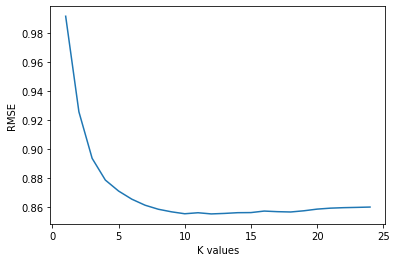

In [20]:
# finding optimal k value
plt.plot(k_values,rmse_list)
plt.xlabel("K values")
plt.ylabel("RMSE")

In [22]:
#Finding the optimal K value
min_rmse_k_value = k_values[rmse_list.index(min(rmse_list))]
print(min_rmse_k_value)

12


In [23]:
#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,min_rmse_k_value)
optimal_RMSE

0.855050010733312